In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" when films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [35]:
superman_batman = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
grouped = superman_batman.groupby(['year','character'])
compare = grouped.size().unstack().fillna(0)
compare['diff'] = compare['Superman'] - compare['Batman']
len(compare[compare['diff'] > 0])


11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [63]:
superman_batman = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
grouped = superman_batman.groupby(['year','character'])
compare = grouped.size().unstack().fillna(0)
len(compare[(compare.Batman - compare.Superman) > 0])

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

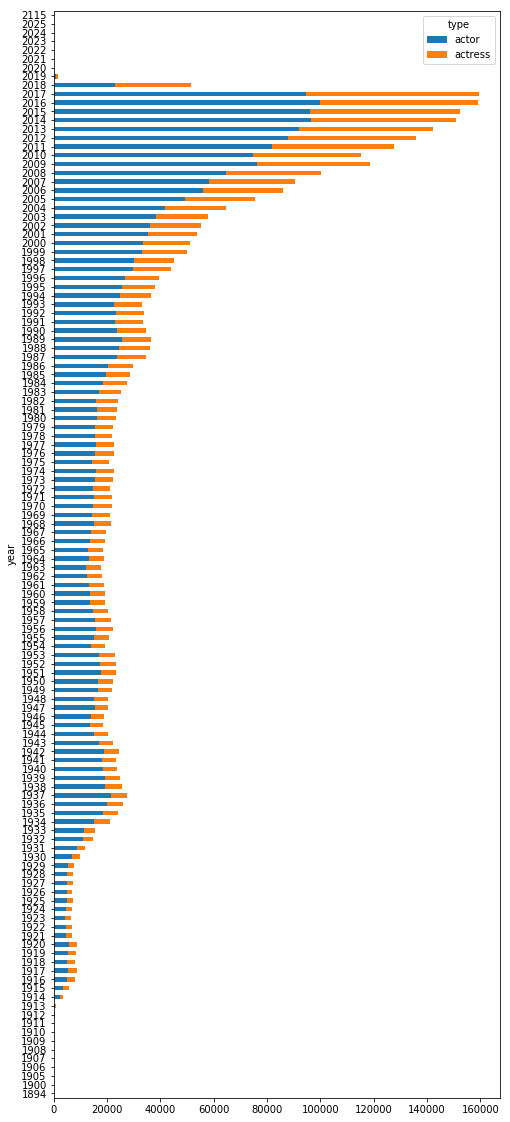

In [79]:
actor_actress = cast.groupby(['year', 'type'])
table = actor_actress.size().unstack().fillna(0)
table.plot(kind='barh', stacked=True, figsize=[8, 20])

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

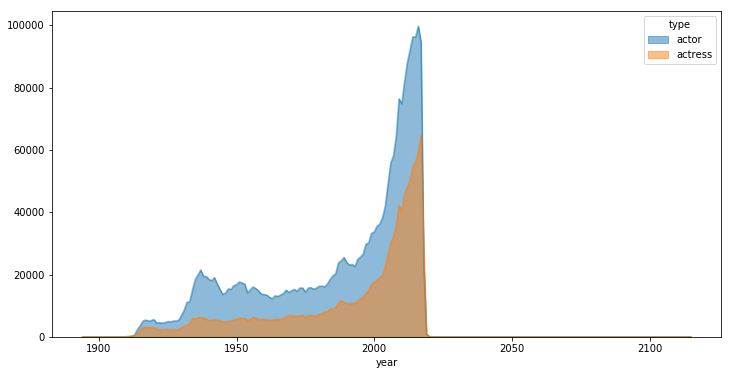

In [82]:
actor_actress = cast.groupby(['year', 'type'])
table = actor_actress.size().unstack().fillna(0)
table.plot(kind='area', stacked=False, figsize=[12,6])

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

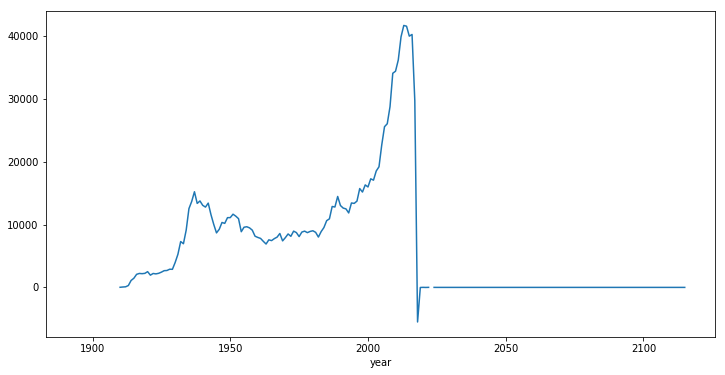

In [150]:
actor_actress = cast.groupby(['year', 'type'])
table = actor_actress.size().unstack()
diff = table.actor - table.actress
diff.plot(kind='line', figsize=[12,6])

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

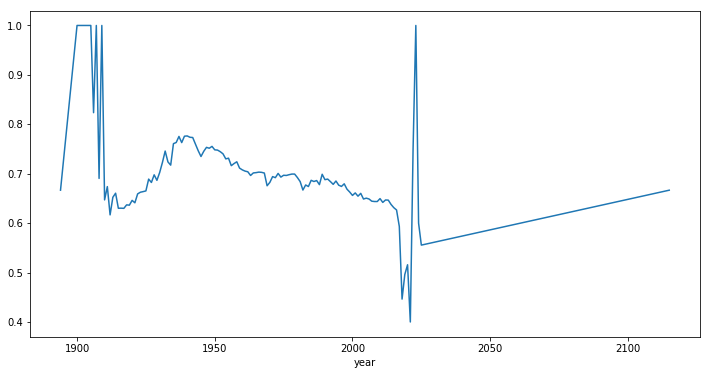

In [155]:
actor_actress = cast.groupby(['year', 'type'])
table = actor_actress.size().unstack('type').fillna(0)
ratio = table.actor / (table.actor + table.actress)
ratio.plot(kind='line', figsize=[12,6])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

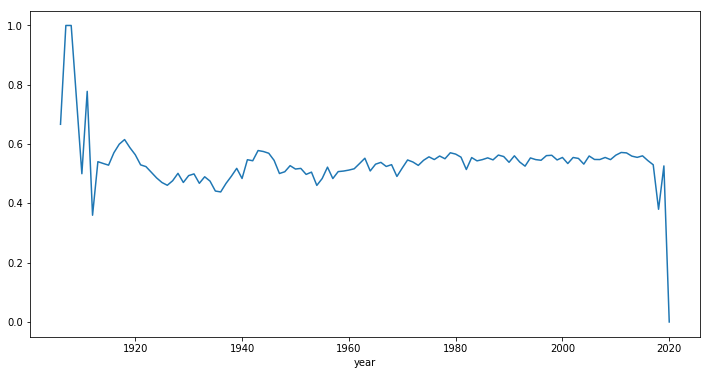

In [126]:
actor_actress_n2 = cast[(cast.n == 2)].groupby(['year', 'type'])
table = actor_actress_n2.size().unstack().fillna(0)
ratio = table.actor / (table.actor + table.actress)
ratio.plot(kind='line', figsize=[12,6])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

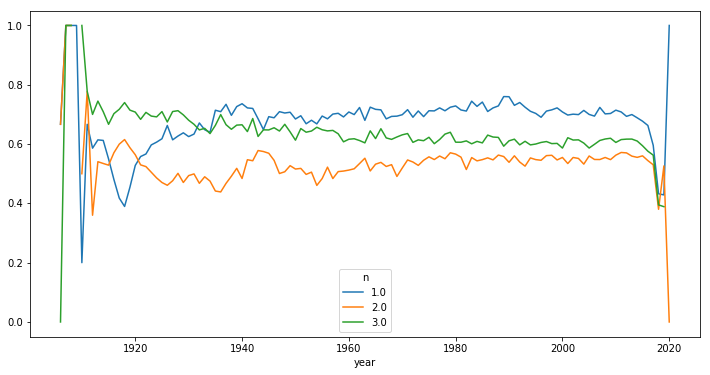

In [164]:
actor_actress_n = cast[(cast.n.between(1,3, inclusive=True))].groupby(['year', 'n', 'type'])
table = actor_actress_n.size().unstack('type').fillna(0)
ratio = table.actor / (table.actor + table.actress)
ratio.unstack('n').plot(kind='line', figsize=[12,6])